In [56]:
from keras.layers import Input, Dense
from keras.models import Model

In [57]:
encoding_dim=32
input_img=Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)

In [58]:
auto_encoder=Model(input_img,decoded)

In [59]:
#Encoder model:
encoder = Model(input_img, encoded)

In [60]:
#Decoder model:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = auto_encoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [61]:
auto_encoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [62]:
#Download data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
num_pixels = x_train.shape[1] * x_train.shape[2]
print(num_pixels)

784


In [63]:
#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [64]:
print(len(x_train[1]))

784


In [65]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [66]:
x_test_noisy.shape

(10000, 784)

In [67]:
#Train model over 50 epochs
auto_encoder.fit(x_train_noisy, x_train_noisy,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
 26/235 [==>...........................] - ETA: 0s - loss: 0.6951

2022-09-12 12:45:39.308493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 5ms/step - loss: 0.6950 - val_loss: 0.6944
Epoch 2/50
 13/235 [>.............................] - ETA: 0s - loss: 0.6950

2022-09-12 12:45:40.367406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 1s 4ms/step - loss: 0.6949 - val_loss: 0.6942
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6948 - val_loss: 0.6941
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6947 - val_loss: 0.6940
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6946 - val_loss: 0.6939
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6945 - val_loss: 0.6937
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6936
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6943 - val_loss: 0.6935
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.6942 - val_loss: 0.6934
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6941 - val_loss: 0.6933
Epoch 11/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6931
Epoch 12/

In [68]:
#Make predictions
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

197/313 [=================>............] - ETA: 0s

2022-09-12 12:46:42.626151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/313 [=================>............] - ETA: 0s

2022-09-12 12:46:42.921062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 790us/step


In [84]:
x_test_noisy.shape

(10000, 28, 28)

In [69]:
import numpy as np
import matplotlib.pyplot as plt

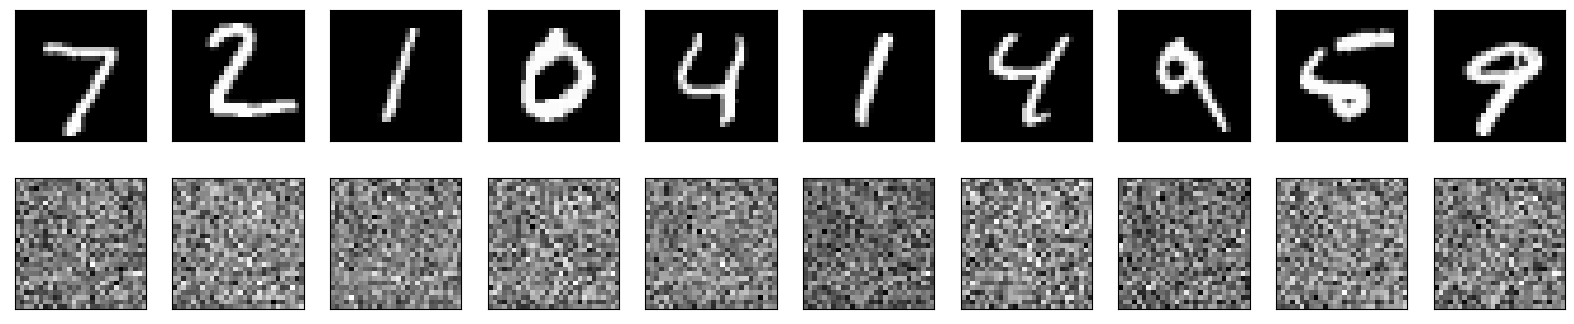

In [72]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [73]:
from tensorflow.keras import Sequential

In [74]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=len(x_train[1]), activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [92]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [77]:
# Training model
model.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 2s 7ms/step - loss: 0.0218 - val_loss: 0.0203
Epoch 2/2
300/300 [==============================] - 2s 7ms/step - loss: 0.0194 - val_loss: 0.0186


In [79]:
# Final evaluation of the model
pred = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


In [80]:
x_test.shape

(10000, 784)

In [37]:
import numpy

Test Images


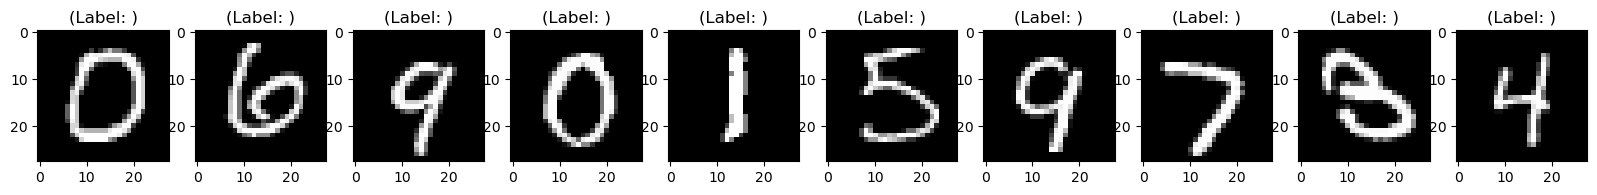

Test Images with Noise


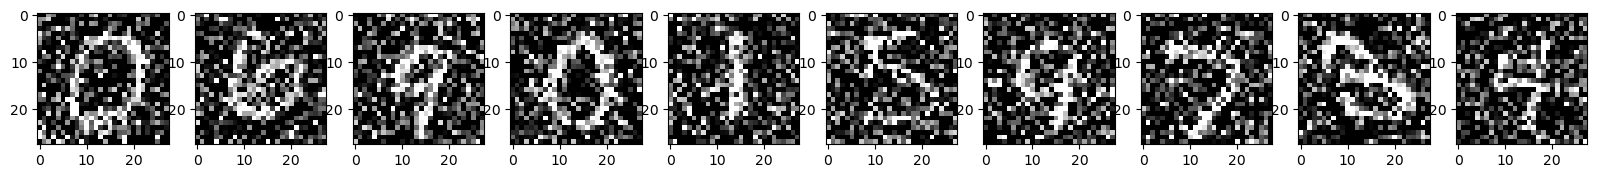

Reconstruction of Noisy Test Images


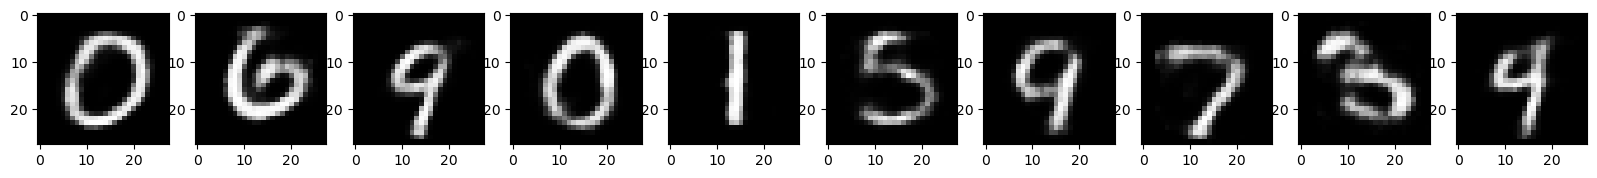

In [82]:
X_test = numpy.reshape(x_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    #curr_lbl = y_test[i]
    plt.title("(Label: "  + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()